In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model

# from utils import vgg

from skimage.transform import resize
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

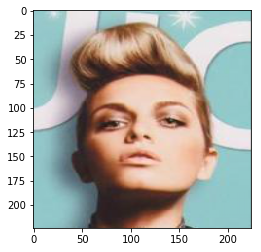

In [2]:
def name(n):
    return "%.6d" % (n+1) + ".jpg"

def pic(n):
    img = plt.imread("./data/img_align_celeba/" + name(n))
    img = resize(img, (224, 224))
    return img

img = pic(4)
plt.imshow(img);

In [ ]:
vgg.summary()

In [3]:
def build_encoder(lat_dim=100, slope=0.2, std=0.02, rate=0.8):
    init = RandomNormal(stddev=std)
    inp = layers.Input(shape=img.shape)

    X = layers.Conv2D(32, 5, strides=(2, 2), padding='same', kernel_initializer=init)(inp)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(64, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(128, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(256, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(512, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(1024, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
   
    X = layers.Flatten()(X)
    X = layers.Dropout(rate=rate)(X)
    X = layers.Dense(lat_dim)(X)
    return Model(inp, X)

In [3]:
# encoder = build_encoder(100)
encoder = tf.keras.models.load_model("encoder.hdf5")
# encoder.summary()

W0413 13:40:48.666152 140191901062976 hdf5_format.py:224] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [5]:
def build_generator(lat_dim=100, std=0.02):
    init = RandomNormal(stddev=std)
    inp = layers.Input(shape=(lat_dim,))
    
    X = layers.Dense(14*14*1024, kernel_initializer=init)(inp)
    X = layers.Reshape((14, 14, 1024))(X)
    X = layers.BatchNormalization()(X)
    X = layers.ReLU()(X)
    
    X = layers.Conv2DTranspose(512, 5, strides=(2, 2), padding="same", kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.ReLU()(X)
    
    X = layers.Conv2DTranspose(256, 5, strides=(2, 2), padding="same", kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.ReLU()(X)
    
    X = layers.Conv2DTranspose(128, 5, strides=(2, 2), padding="same", kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.ReLU()(X)
    
    X = layers.Conv2DTranspose(3, 5, strides=(2, 2), padding="same", activation="tanh", kernel_initializer=init)(X)
    return Model(inp, X)

In [4]:
# gen = build_generator(100)
gen = tf.keras.models.load_model("gen.hdf5")
# gen.summary()

W0413 13:40:53.825552 140191901062976 hdf5_format.py:224] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [7]:
def build_lat_discriminator(lat_dim=100, slope=0.2, std=0.02, rate=0.5):
    init = RandomNormal(stddev=std)
    inp = layers.Input(shape=(lat_dim,))
    
    X = layers.Dense(1024, kernel_initializer=init)(inp)
    X = layers.LeakyReLU(slope)(X)
    X = layers.Dropout(rate)(X)
    
    X = layers.Dense(1024, kernel_initializer=init)(X)
    X = layers.LeakyReLU(slope)(X)
    X = layers.Dropout(rate)(X)
    
    X = layers.Dense(1024, kernel_initializer=init)(X)
    X = layers.LeakyReLU(slope)(X)
    X = layers.Dropout(rate)(X)

    X = layers.Dense(1)(X)
    return Model(inp, X)

In [5]:
# lat_discr = build_lat_discriminator(100)
lat_discr = tf.keras.models.load_model("lat_discr.hdf5")
# lat_discr.summary()

W0413 13:40:57.766742 140191901062976 hdf5_format.py:224] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [9]:
def build_discriminator(slope=0.2, std=0.02, rate=0.8):
    init = RandomNormal(stddev=std)
    inp = layers.Input(shape=img.shape)

    X = layers.Conv2D(64, 5, strides=(2, 2), padding='same', kernel_initializer=init)(inp)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(128, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(256, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(512, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
    
    X = layers.Conv2D(1024, 5, strides=(2, 2), padding='same', kernel_initializer=init)(X)
    X = layers.BatchNormalization()(X)
    X = layers.LeakyReLU(slope)(X)
   
    X = layers.Flatten()(X)
    X = layers.Dropout(rate=rate)(X)
    X = layers.Dense(1)(X)
    return Model(inp, X)

In [6]:
# discr = build_discriminator()
discr = tf.keras.models.load_model("discr.hdf5")
# discr.summary()

W0413 13:41:01.317416 140191901062976 hdf5_format.py:224] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [7]:
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()
entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cosine = tf.keras.losses.CosineSimilarity()

In [8]:
lat_dim = 100
l_rate = 0.00005
b1 = 0.6

enc_opt = tf.keras.optimizers.Adam(l_rate, b1)
lat_discr_opt = tf.keras.optimizers.Adam(l_rate, b1)
gen_opt = tf.keras.optimizers.Adam(l_rate, b1)
discr_opt = tf.keras.optimizers.Adam(l_rate, b1)


batch_size = 64

@tf.function
def train_step(real_images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as discr_tape, \
        tf.GradientTape() as enc_tape, tf.GradientTape() as ldiscr_tape:
        
        encoded = encoder(real_images, training=True)
        noise = tf.random.normal(shape=[batch_size, lat_dim])

        reconstructed = gen(encoded, training=True)
        fake_images = gen(noise, training=True)
        
        noise_codes_output = lat_discr(noise, training=True)
        real_codes_output = lat_discr(encoded, training=True)
        
        fake_output = discr(fake_images, training=True)
        real_output = discr(real_images, training=True)
        reconstructed_output = discr(reconstructed, training=True)
        
#         vgg_real_codes = vgg(real_images, training=False)
#         vgg_fake_codes = vgg(reconstructed, training=False)
        
        reconstructed_loss = mae(reconstructed, real_images)
        
        enc_loss = reconstructed_loss + entropy(tf.ones_like(real_codes_output), real_codes_output)
        
        gen_loss = reconstructed_loss + entropy(tf.ones_like(fake_output), fake_output) + \
                    entropy(tf.ones_like(reconstructed_output), reconstructed_output)
        
        discr_loss = entropy(0.95*tf.ones_like(real_output), real_output) + \
                         entropy(tf.zeros_like(fake_output), fake_output) + \
                         entropy(tf.zeros_like(reconstructed_output), reconstructed_output)
        
        lat_discr_loss = entropy(0.95*tf.ones_like(noise_codes_output), noise_codes_output) + \
                         entropy(tf.zeros_like(real_codes_output), real_codes_output)
        

        gen_grads = gen_tape.gradient(gen_loss, gen.trainable_variables)
        lat_discr_grads = ldiscr_tape.gradient(lat_discr_loss, lat_discr.trainable_variables)
        enc_grads = enc_tape.gradient(enc_loss, encoder.trainable_variables)
        discr_grads = discr_tape.gradient(discr_loss, discr.trainable_variables)

    gen_opt.apply_gradients(zip(gen_grads, gen.trainable_variables))
    lat_discr_opt.apply_gradients(zip(lat_discr_grads, lat_discr.trainable_variables))
    enc_opt.apply_gradients(zip(enc_grads, encoder.trainable_variables))
    discr_opt.apply_gradients(zip(discr_grads, discr.trainable_variables))
    
    return gen_loss, lat_discr_loss, enc_loss, discr_loss

In [9]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self.ids = np.arange(200_000)
        self.on_epoch_end()
        
    def __getitem__(self, index):
        ids = self.ids[self.batch_size * index : self.batch_size * (index + 1)]
        X = np.empty((self.batch_size, *img.shape), dtype=np.float32)
        for i, _id in enumerate(ids):
            X[i] = pic(_id)
        return X
    
    def __len__(self):
        return len(self.ids) // self.batch_size
    
    def on_epoch_end(self):
        np.random.shuffle(self.ids)

In [10]:
def generate_images(gen, encoder, n):
    x = pic(n).reshape((1, *img.shape))
    real_code = encoder.predict(x)
    code = tf.random.normal(shape=[1, lat_dim])
    _x = gen.predict(code)
    print('Lat discr:', lat_discr.predict(real_code), lat_discr.predict(code))  # 0, 1
    print('Discr:', discr.predict(x), discr.predict(_x))  # 1, 0
    _img = gen(code)
    fig = plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(_img[0, :, :])
    plt.axis('off')
    plt.subplot(122)
    _img = gen(real_code)
    plt.imshow(_img[0, :, :])
    plt.axis('off')
    plt.show()

W0413 16:11:20.559464 140191901062976 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0413 16:11:20.579063 140191901062976 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lat discr: [[-0.13731118]] [[-0.10356273]]
Discr: [[2.4728487]] [[-4.1995864]]


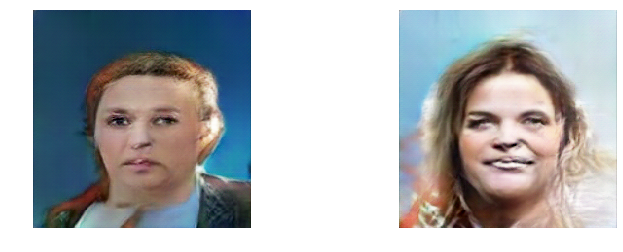

E-1 I-1141 tf.Tensor(9.455534, shape=(), dtype=float32):tf.Tensor(0.4152562, shape=(), dtype=float32):tf.Tensor(0.93074155, shape=(), dtype=float32):tf.Tensor(1.354049, shape=(), dtype=float32)


In [ ]:
epochs = 10
data = DataGenerator(batch_size)

for epoch in range(1, epochs + 1):
    for i, images in enumerate(data):
        gl, ldl, el, dl = train_step(images)
        if i % 20 == 0:
            display.clear_output(wait=True)
            generate_images(gen, encoder, 4)
            print("E-%d I-%d %s:%s:%s:%s" % (epoch, (i+1), str(gl), str(dl), str(el), str(ldl)))

W0413 13:31:27.904199 140467161093952 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


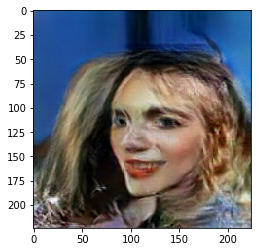

In [216]:
plt.imshow(gen.predict(np.random.normal(size=(1, lat_dim))).reshape((img.shape)));

W0413 14:50:44.434439 140191901062976 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


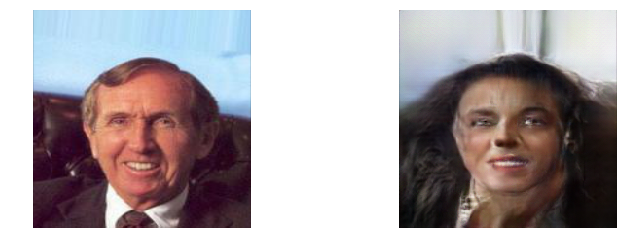

In [51]:
idx = 20
vec1 = encoder.predict(pic(idx).reshape(1, *img.shape))
_img = gen.predict(vec1).reshape(*img.shape)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(pic(idx))
plt.axis('off')
plt.subplot(122)
plt.imshow(_img)
plt.axis('off');

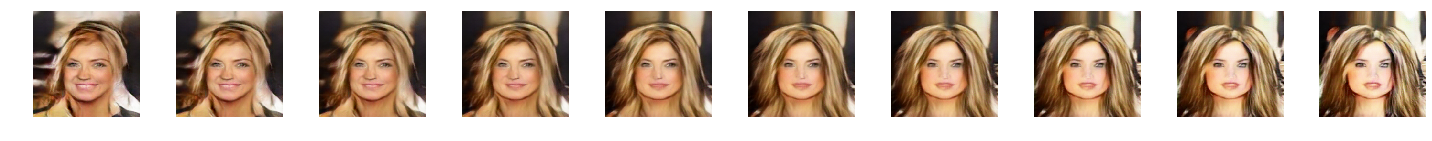

In [48]:
# vec1 = np.random.normal(size=([1, lat_dim]))
# vec2 = np.random.normal(size=([1, lat_dim]))
alpha = np.arange(0, 1., 0.1)

plt.figure(figsize=(20, 10))
for i, a in enumerate(alpha):
    plt.subplot(1, len(alpha), i+1)
    vec = a * vec1 + (1-a) * vec2
    _img = gen.predict(vec).reshape(*img.shape)
    _img[_img < 0] = 0
    plt.imshow(_img)
    plt.axis('off')
plt.tight_layout();

In [219]:
gen.save("gen.hdf5")
discr.save("discr.hdf5")
encoder.save("encoder.hdf5")
lat_discr.save("lat_discr.hdf5")